Problem Statement: You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

New_Price: The price of a new car of the same model.

Price: The price of the used car in INR Lakhs.

In [1]:
#Importing some important python packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import DataFrame

In [2]:
#Reading train and test dataset of used cars in India
train = pd.read_csv(r'E:\CLG\6th sem\ML\MJ\Data_Train_1.csv')
test = pd.read_csv(r'E:\CLG\6th sem\ML\MJ\Data_Test_1.csv')
train.shape

(6019, 12)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


# 1. Data Cleaning and Preparation

In [4]:
#Null values present in training data
train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [5]:
#Extracted the brand name of the car by splitting the name column
train['Name'] = train.Name.str.split().str.get(0)
test['Name'] = test.Name.str.split().str.get(0)
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


### 1.1 Dealing with missing values

In [6]:
#Getting columns with missing values
train.columns[train.isnull().any()]

Index(['Mileage', 'Engine', 'Power', 'Seats'], dtype='object')

SEATS COLUMN

In [7]:
#Filling missing places with mean of the seats column
train['Seats'].fillna(train['Seats'].mean(),inplace=True)
test['Seats'].fillna(test['Seats'].mean(),inplace=True)

In [8]:
#Combining test and train data now for more accurate values
data = pd.concat([train,test], sort=False)
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,Volkswagen,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,Nissan,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,Volkswagen,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


MILEAGE COLUMN

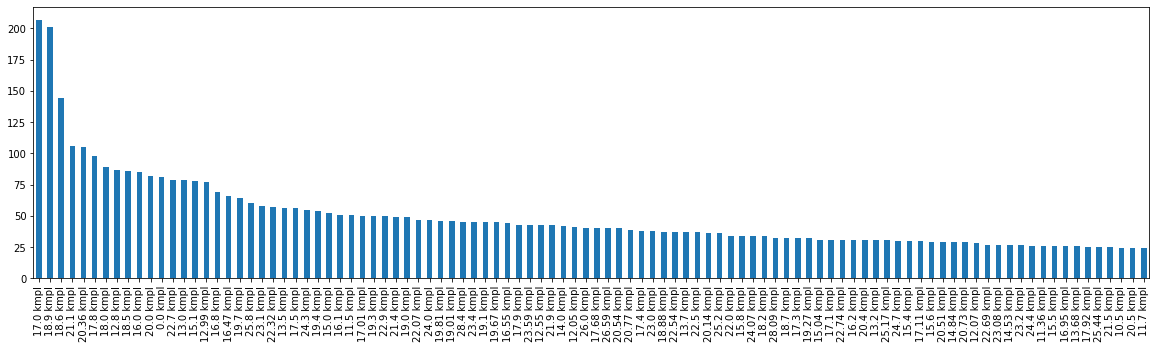

In [9]:
plt.figure(figsize=(20,5))
data['Mileage'].value_counts().head(100).plot.bar()
plt.show()

In [10]:
#Filling the null values in mileage column with 17 as referred by above bar plot
train['Mileage'] = train['Mileage'].fillna('17.0 kmpl')
test['Mileage'] = test['Mileage'].fillna('17.0 kmpl')

#Replacing the entries having 0 mileage with 17 too
train['Mileage'] = train['Mileage'].replace("0.0 kmpl", "17.0 kmpl")
test['Mileage'] = test['Mileage'].replace("0.0 kmpl", "17.0 kmpl")

ENGINE COLUMN

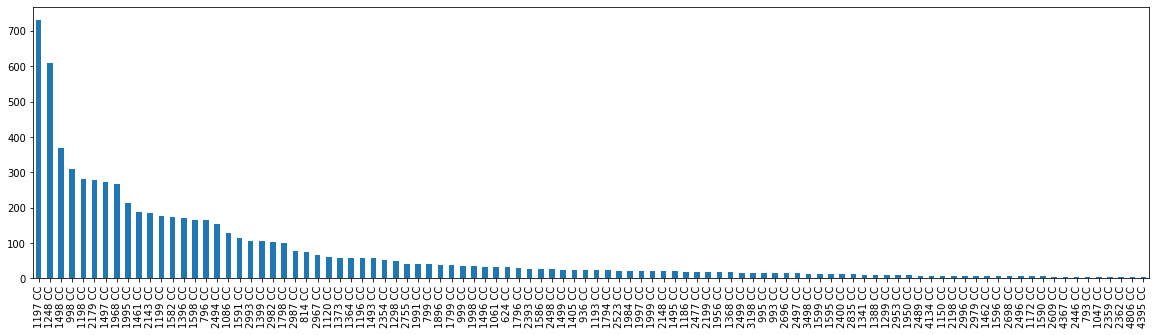

In [11]:
plt.figure(figsize=(20,5))
data['Engine'].value_counts().head(100).plot.bar()
plt.show()

In [12]:
train['Engine'] = train['Engine'].fillna('1197 CC')
test['Engine'] = test['Engine'].fillna('1197 CC')

POWER COLUMN

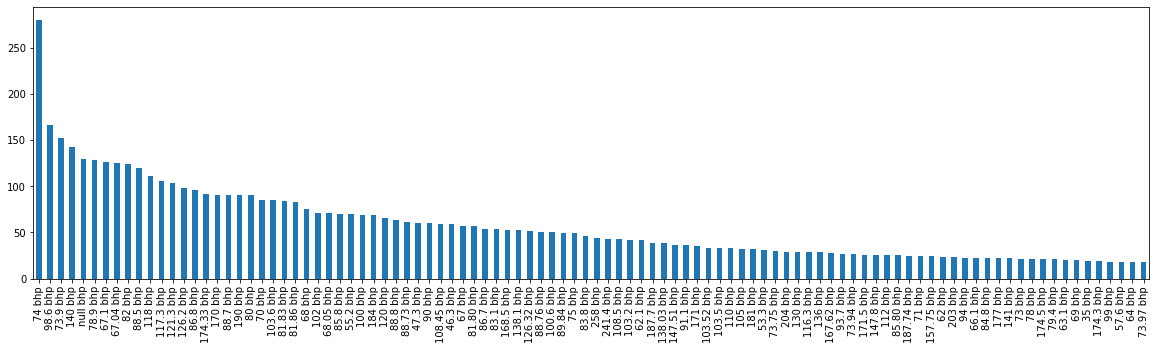

In [13]:
plt.figure(figsize=(20,5))
data['Power'].value_counts().head(100).plot.bar()
plt.show()

In [14]:
train['Power'] = train['Power'].fillna('74 bhp')
test['Power'] = test['Power'].fillna('74 bhp')

#Replacing nullbhp with 74 too
train['Power'] = train['Power'].replace("null bhp", "74 bhp")
test['Power'] = test['Power'].replace("null bhp", "74 bhp")

In [15]:
train['Mileage'] = train['Mileage'].str.replace(r'\D', '')
train['Engine'] = train['Engine'].str.replace(r'\D', '')
train['Power'] = train['Power'].str.replace(r'\D', '')
train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,266,998,5816,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,1967,1582,1262,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,182,1199,887,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,2077,1248,8876,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,152,1968,1408,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,284,1248,74,5.0,4.75
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,244,1120,71,5.0,4.00
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,140,2498,112,8.0,2.90
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,189,998,671,5.0,2.65


In [16]:
test['Mileage'] = test['Mileage'].str.replace(r'\D', '')
test['Engine'] = test['Engine'].str.replace(r'\D', '')
test['Power'] = test['Power'].str.replace(r'\D', '')
test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Delhi,2014,40929,CNG,Manual,First,3226,998,582,4.0
1,Maruti,Coimbatore,2013,54493,Petrol,Manual,Second,247,796,473,5.0
2,Toyota,Mumbai,2017,34000,Diesel,Manual,First,1368,2393,1478,7.0
3,Toyota,Hyderabad,2012,139000,Diesel,Manual,First,2359,1364,74,5.0
4,Hyundai,Mumbai,2014,29000,Petrol,Manual,First,185,1197,8285,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,Volkswagen,Hyderabad,2011,89411,Diesel,Manual,First,2054,1598,1036,5.0
1230,Volkswagen,Mumbai,2015,59000,Petrol,Automatic,First,1721,1197,1036,5.0
1231,Nissan,Kolkata,2012,28000,Diesel,Manual,First,2308,1461,631,5.0
1232,Volkswagen,Pune,2013,52262,Petrol,Automatic,Third,172,1197,1036,5.0


In [17]:
#Seeing the missing values after data cleaning
train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [18]:
#train set info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null object
Engine               6019 non-null object
Power                6019 non-null object
Seats                6019 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [19]:
#test set info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1234 non-null object
Power                1234 non-null object
Seats                1234 non-null float64
dtypes: float64(1), int64(2), object(8)
memory usage: 106.2+ KB


In [20]:
data.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 1233
Data columns (total 12 columns):
Name                 7253 non-null bool
Location             7253 non-null bool
Year                 7253 non-null bool
Kilometers_Driven    7253 non-null bool
Fuel_Type            7253 non-null bool
Transmission         7253 non-null bool
Owner_Type           7253 non-null bool
Mileage              7253 non-null bool
Engine               7253 non-null bool
Power                7253 non-null bool
Seats                7253 non-null bool
Price                7253 non-null bool
dtypes: bool(12)
memory usage: 141.7 KB


### 1.2 Visualisations

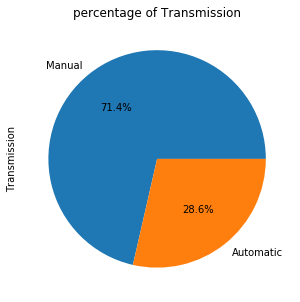

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
import math
import matplotlib
import seaborn as sns
%matplotlib inline

train["Transmission"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(5,5))
plt.title("percentage of Transmission")
plt.show()


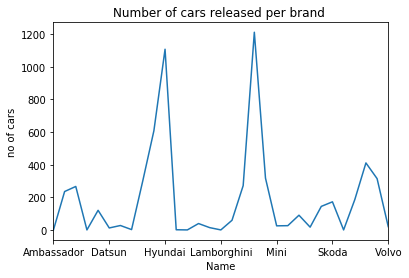

In [22]:
f, axes = plt.subplots()
train.groupby("Name")["Name"].count().plot(ax=axes)
axes.set_ylabel("no of cars")
axes.set_title("Number of cars released per brand ")

plt.show()

[Text(0, 0.5, 'Number of cars in each fuel type'),
 Text(0.5, 0, 'Types Of fuel types')]

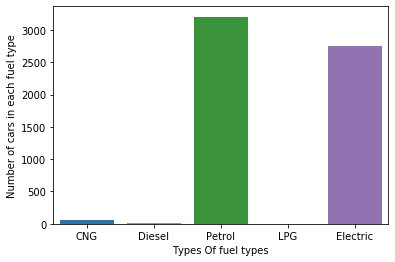

In [23]:
f, axes = plt.subplots ()

x=['CNG','Diesel','Petrol','LPG','Electric']
y = [train.Fuel_Type[(train['Fuel_Type']=='CNG')].count(),train.Fuel_Type[(train['Fuel_Type']=='LPG')].count(),
     train.Fuel_Type[(train['Fuel_Type']=='Diesel')].count(),train.Fuel_Type[(train['Fuel_Type']=='Electric')].count(),
     train.Fuel_Type[(train['Fuel_Type']=='Petrol')].count()]
plt= sns.barplot(x,y)  
plt.set(xlabel='Types Of fuel types',ylabel='Number of cars in each fuel type')
    

### 1.3 Dealing with Categorical Variables

In [24]:
from sklearn.model_selection import train_test_split

y = np.log1p(train.Price)
X = train.drop(['Price'],axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.82,test_size=0.18,random_state=0)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

X_train['Name'] = le.fit_transform(X_train['Name'])
X_valid['Name'] = le.transform(X_valid['Name'])
test['Name'] = le.fit_transform(test['Name'])

X_train['Location'] = le.fit_transform(X_train['Location'])
X_valid['Location'] = le.transform(X_valid['Location'])
test['Location'] = le.fit_transform(test['Location'])

X_train['Fuel_Type'] = le.fit_transform(X_train['Fuel_Type'])
X_valid['Fuel_Type'] = le.transform(X_valid['Fuel_Type'])
test['Fuel_Type'] = le.fit_transform(test['Fuel_Type'])

X_train['Transmission'] = le.fit_transform(X_train['Transmission'])
X_valid['Transmission'] = le.transform(X_valid['Transmission'])
test['Transmission'] = le.fit_transform(test['Transmission'])

X_train['Owner_Type'] = le.fit_transform(X_train['Owner_Type'])
X_valid['Owner_Type'] = le.transform(X_valid['Owner_Type'])
test['Owner_Type'] = le.fit_transform(test['Owner_Type'])

In [26]:
X_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
2058,24,7,2015,75863,1,1,0,1901,1461,10845,5.0
898,9,4,2010,43000,4,1,2,168,1497,1163,5.0
2624,10,7,2015,66337,1,1,0,240,1120,70,5.0
794,10,9,2018,19500,4,1,0,186,1197,8183,5.0
2141,27,2,2016,78000,1,1,2,250,1396,6901,5.0


In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4935 entries, 2058 to 2732
Data columns (total 11 columns):
Name                 4935 non-null int32
Location             4935 non-null int32
Year                 4935 non-null int64
Kilometers_Driven    4935 non-null int64
Fuel_Type            4935 non-null int32
Transmission         4935 non-null int32
Owner_Type           4935 non-null int32
Mileage              4935 non-null object
Engine               4935 non-null object
Power                4935 non-null object
Seats                4935 non-null float64
dtypes: float64(1), int32(5), int64(2), object(3)
memory usage: 366.3+ KB


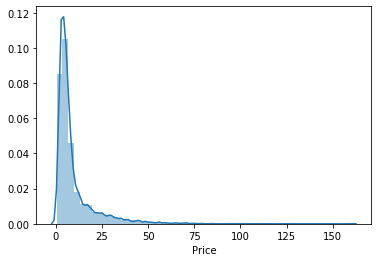

In [49]:
import seaborn as seabornInstance 
a=seabornInstance.distplot(train['Price'])
plt

# 2.Model

In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#To retrieve the intercept:
print(reg.intercept_)
#For retrieving the slope:
print(reg.coef_)

-203.16415023768602
[-6.28649872e-03 -1.67789203e-02  1.01808874e-01 -8.82179984e-08
 -4.93305114e-02 -4.33742058e-01 -2.41704896e-02  2.50604712e-05
  7.11450338e-04  4.94218541e-06 -6.69630589e-02]


# 3.Predictions

In [31]:
y_pred=reg.predict(X_valid)
print(y_pred)
y_pred=reg.predict(X_valid).round(2)
print(y_pred)

[2.23526304 1.34183153 1.53310769 ... 1.85104415 0.98837288 1.22443031]
[2.24 1.34 1.53 ... 1.85 0.99 1.22]


In [32]:
import pandas as pd
df = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred})
df1=df.head(25)

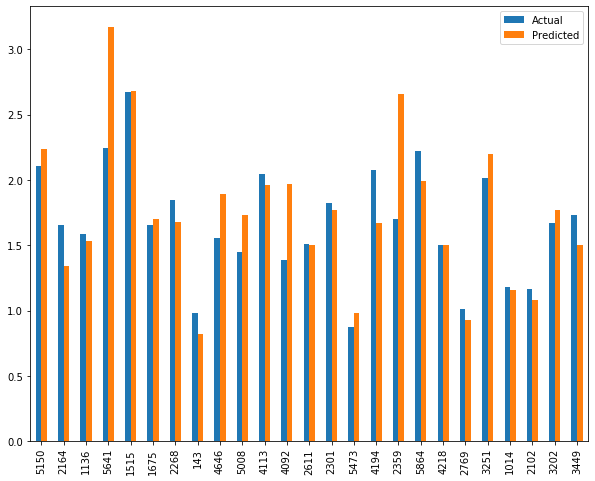

In [33]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt

In [37]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))

Mean Absolute Error: 0.2290560628596625
Mean Squared Error: 0.09903790804642167
Root Mean Squared Error: 0.314702888525704


In [58]:
plt.scatter(X_valid, y_valid,  color='gray')
plt.plot(X_valid, y_pred, color='red', linewidth=2)
plt.show()

ValueError: x and y must be the same size

In [42]:
import pandas as pd
output = pd.DataFrame({'Price': y_pred})
output.to_excel('final.xlsx', index=False)

# 4.Conclusions

<ul>
<li> Dropping the units of Mileage, Engine and Power column is important  because it gives error of string to float conversion</li>
<li>LabelEncoder won't work if there are missing values.</li>
<li>The value of errors obtained are as follows :-
<ol>
<li>Mean Absolute Error: 0.2290560628596625</li>
<li>Mean Squared Error: 0.09903790804642167</li>
<li>Root Mean Squared Error: 0.314702888525704</li>
</ol>
</ul>
